# MACHINE LEARNING

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
import pickle

In [2]:
%matplotlib inline
pd.set_option("display.max_columns", None)
from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

## Preprocessing the data

In [3]:
df = pd.read_csv('lol_ml_data.csv')

In [37]:
df.head()

,p1_champ,p2_champ,p3_champ,p4_champ,p5_champ,p6_champ,p7_champ,p8_champ,p9_champ,p10_champ,game_length_mins,blue_team_win,red_team_win,p1_spell1,p2_spell1,p3_spell1,p4_spell1,p5_spell1,p6_spell1,p7_spell1,p8_spell1,p9_spell1,p10_spell1,p1_spell2,p2_spell2,p3_spell2,p4_spell2,p5_spell2,p6_spell2,p7_spell2,p8_spell2,p9_spell2,p10_spell2,p1perkPrimaryStyle,p2perkPrimaryStyle,p3perkPrimaryStyle,p4perkPrimaryStyle,p5perkPrimaryStyle,p6perkPrimaryStyle,p7perkPrimaryStyle,p8perkPrimaryStyle,p9perkPrimaryStyle,p10perkPrimaryStyle,p1perkSubStyle,p2perkSubStyle,p3perkSubStyle,p4perkSubStyle,p5perkSubStyle,p6perkSubStyle,p7perkSubStyle,p8perkSubStyle,p9perkSubStyle,p10perkSubStyle,p1_champ_prim_role,p2_champ_prim_role,p3_champ_prim_role,p4_champ_prim_role,p5_champ_prim_role,p6_champ_prim_role,p7_champ_prim_role,p8_champ_prim_role,p9_champ_prim_role,p10_champ_prim_role,p1_champ_sec_role,p2_champ_sec_role,p3_champ_sec_role,p4_champ_sec_role,p5_champ_sec_role,p6_champ_sec_role,p7_champ_sec_role,p8_champ_sec_role,p9_champ_sec_role,p10_champ_sec_role,tank_count,mage_count,marksman_count,support_count,fighter_count,assassin_count
0,Karma,Teemo,JarvanIV,Ezreal,Neeko,Ryze,Kaisa,Cassiopeia,Braum,Rengar,38.466667,Win,Fail,SummonerFlash,SummonerIgnite,SummonerFlash,SummonerFlash,SummonerFlash,SummonerTeleport,SummonerFlash,SummonerBoost,SummonerIgnite,SummonerFlash,SummonerIgnite,SummonerFlash,SummonerSmite,SummonerHeal,SummonerIgnite,SummonerFlash,SummonerHeal,SummonerFlash,SummonerFlash,SummonerSmite,Sorcery,Sorcery,Domination,Inspiration,Sorcery,Sorcery,Inspiration,Sorcery,Resolve,Domination,Inspiration,Domination,Inspiration,Sorcery,Domination,Domination,Sorcery,Domination,Inspiration,Sorcery,Mage,Marksman,Tank,Marksman,Mage,Mage,Marksman,Mage,Support,Assassin,Support,Assassin,Fighter,Mage,Support,Fighter,None,None,Tank,Fighter,2,5,3,3,3,2
1,Teemo,Tristana,LeeSin,Bard,Leblanc,Lucian,Irelia,Blitzcrank,Orianna,Kindred,23.400000,Win,Fail,SummonerFlash,SummonerFlash,SummonerFlash,SummonerFlash,SummonerIgnite,SummonerHeal,SummonerTeleport,SummonerIgnite,SummonerBarrier,SummonerFlash,SummonerIgnite,SummonerHeal,SummonerSmite,SummonerIgnite,SummonerFlash,SummonerFlash,SummonerFlash,SummonerFlash,SummonerFlash,SummonerSmite,Sorcery,Inspiration,Domination,Domination,Domination,Inspiration,Inspiration,Resolve,Sorcery,Inspiration,Resolve,Sorcery,Inspiration,Resolve,Sorcery,Sorcery,Sorcery,Inspiration,Inspiration,Domination,Marksman,Marksman,Fighter,Support,Assassin,Marksman,Fighter,Tank,Mage,Marksman,Assassin,Assassin,Assassin,Mage,Mage,None,Assassin,Fighter,Support,None,1,3,4,2,3,5
2,JarvanIV,Lux,Zyra,Jax,Kaisa,Tryndamere,Ezreal,Thresh,Xerath,Karthus,31.733333,Fail,Win,SummonerFlash,SummonerFlash,SummonerTeleport,SummonerTeleport,SummonerFlash,SummonerIgnite,SummonerHeal,SummonerIgnite,SummonerHeal,SummonerSmite,SummonerSmite,SummonerIgnite,SummonerFlash,SummonerFlash,SummonerHeal,SummonerFlash,SummonerFlash,SummonerFlash,SummonerFlash,SummonerFlash,Domination,Sorcery,Sorcery,Inspiration,Inspiration,Inspiration,Inspiration,Resolve,Sorcery,Domination,Inspiration,Inspiration,Domination,Inspiration,Sorcery,Resolve,Sorcery,Inspiration,Inspiration,Inspiration,Tank,Mage,Mage,Fighter,Marksman,Fighter,Marksman,Support,Mage,Mage,Fighter,Support,Support,Assassin,None,Assassin,Mage,Fighter,Assassin,None,1,5,2,3,4,3
3,Blitzcrank,Graves,Caitlyn,Kled,Diana,LeeSin,Lucian,Thresh,Lissandra,Urgot,35.366667,Win,Fail,SummonerIgnite,SummonerFlash,SummonerHeal,SummonerTeleport,SummonerFlash,SummonerFlash,SummonerHeal,SummonerFlash,SummonerTeleport,SummonerFlash,SummonerFlash,SummonerSmite,SummonerFlash,SummonerFlash,SummonerTeleport,SummonerSmite,SummonerFlash,SummonerIgnite,SummonerFlash,SummonerTeleport,Resolve,Inspiration,Inspiration,Inspiration,Sorcery,Domination,Inspiration,Resolve,Sorcery,Inspiration,Sorcery,Sorcery,Sorcery,Resolve,Domination,Inspiration,Sorcery,Inspiration,Inspiration,Resolve,Tank,Marksman,Marksman,Fighter,Fighter,Fighter,Marksman,Support,Mage,Fighter

In [4]:
#the data we want to predict
red_win = df['red_team_win'].values
blue_win = df['blue_team_win'].values
game_length = df['game_length_mins'].values

In [5]:
red_win[:5]

array(['Fail', 'Fail', 'Win', 'Fail', 'Win'], dtype=object)

In [5]:
#Create features
X = df.drop(['red_team_win', 'blue_team_win', 'game_length_mins'], axis=1)

In [6]:
#Create a list of the categorical features
col_list = X.columns.tolist()
cat_feat = col_list[:-6]

In [7]:
#Create dummy variables for categorical features
X = pd.get_dummies(X, columns=cat_feat, drop_first=True)

## Building a Random Forest model

### Let's test a Random Forest Classifier out of the box with out hyper parameter tuning.

In [8]:
rf = RandomForestClassifier()
X_train, X_test, y_train, y_test = train_test_split(X, red_win, test_size=0.2, random_state=42)
#rf.fit(X_train, y_train)

### Get the accuracy score for our Random Forest model.

In [63]:
rf.score(X_test, y_test)

0.8074592890912274

In [145]:
y_pred = rf.predict(X_test)
y_pred

array(['Win', 'Fail', 'Win', ..., 'Win', 'Fail', 'Fail'], dtype=object)

In [162]:
#CLassification report
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

       Fail       0.79      0.86      0.82     14336
        Win       0.84      0.77      0.80     14219

avg / total       0.82      0.81      0.81     28555



### Cross Validation for the Random Forest model.

In [84]:
#Does cross_val_score fit the model and save the fitted model to rf2?
rf2 = RandomForestClassifier()
cv_rf_results = cross_val_score(rf2, X, red_win, cv=5)
print(cv_rf_results)

[0.92365878 0.95885134 0.86366183 0.65612524 0.67160468]


In [85]:
# Get the mean score of the cross validation
np.mean(cv_rf_results)

0.8147803728451987

### Try out of the box Random Forest Model again and scaling the features

In [165]:
# Set up pipeline
steps = [('scaler', StandardScaler()),
        ('rforest', RandomForestClassifier())]

pl = Pipeline(steps)

In [87]:
#Cross validation
scaled_cv_rf_results = cross_val_score(pl, X, red_win, cv=5)

In [88]:
print(scaled_cv_rf_results)

[0.92505953 0.95766065 0.86124536 0.6562303  0.67412622]


In [110]:
cv_score = np.mean(scaled_cv_rf_results)
print(cv_score)

0.8148644128337945


By scaling the features, we get slightly better performance from the model.

In [166]:
pl.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('rforest', RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
 ...n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False))])

In [168]:
pl_predict = pl.predict(X_test)

In [169]:
print(classification_report(y_test, pl_predict))

             precision    recall  f1-score   support

       Fail       0.79      0.86      0.82     14336
        Win       0.84      0.77      0.80     14219

avg / total       0.81      0.81      0.81     28555



### Hyperparamter Tuning the Random Forest model

In [13]:
rf3 = RandomForestClassifier()

In [99]:
#default hyperparameters
rf3.get_params

<bound method BaseEstimator.get_params of RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)>

In [9]:
n_estimators = [int(x) for x in np.linspace(start=10, stop=100, num=10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
min_samples_split = [2, 3, 5, 10]
min_samples_leaf = [1, 2, 3, 4]
bootstrap = [True, False]

param_grid = {'n_estimators': n_estimators,
              'max_features': max_features,
              'max_depth': max_depth,
              'min_samples_split': min_samples_split,
              'min_samples_leaf': min_samples_leaf,
              'bootstrap': bootstrap}

In [104]:
#Use RandomizedSearchCV to see if we can get estimate of better hyperparameters
#n_jobs set to 2?
#cv set to 3?
# Take a smaller subset of the data to split into training and testing
# for finding hyper parameters, maybe 20k games

#Takes about an hour to run on the full training set
#rf_rand_cv = RandomizedSearchCV(estimator=rf3, param_distributions=param_grid,
#                                cv=5, n_iter=10, random_state=42)

In [ ]:
rf_rand_cv = RandomizedSearchCV(estimator=rf3, param_distributions=param_grid,
                                cv=3, n_iter=10, n_jobs=2, random_state=42)

In [103]:
rf_rand_cv.fit(X_train, y_train)

RandomizedSearchCV(cv=5, error_score='raise',
          estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
          fit_params=None, iid=True, n_iter=10, n_jobs=1,
          param_distributions={'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 3, 5, 10], 'min_samples_leaf': [1, 2, 3, 4], 'bootstrap': [True, False]},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score='warn', scoring=None, verbose=0)

In [105]:
#Find best hyperparameters
rf_rand_cv.best_params_

{'bootstrap': False,
 'max_depth': 80,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 60}

#### BEST MODEL SO FAR

In [34]:
#Use best hyperparamters and cross validate score
#BEST MODEL SO FAR
rf4 = RandomForestClassifier(bootstrap=True,
                                max_depth=80, max_features='sqrt',
                                min_samples_leaf=1, min_samples_split=5,
                                n_estimators=60)

cv_rf_results_params = cross_val_score(rf4, X, red_win, cv=5)

print(cv_rf_results_params)

[0.92810618 0.95937664 0.86849478 0.66232402 0.68120053]


In [35]:
cv_score2 = np.mean(cv_rf_results_params)
print(cv_score2)

0.8199004301394114


In [37]:
#Find improvement with tuned hyperparameters
diff = cv_score2 - 0.8148644128337945
print(f'Using the current hyperparameters above increased the accuracy of the model by {diff:.5f}%')

Using the current hyperparameters above increased the accuracy of the model by 0.00504%


In [39]:
rf4.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=80, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=5,
            min_weight_fraction_leaf=0.0, n_estimators=60, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [53]:
# pickle the model
#file_name = 'rf_model_best.pickle'
#with open('ML_models\\'+file_name, 'wb') as file:
#    pickle.dump(rf4, file)

In [40]:
rf4_predict = rf4.predict(X_test)

In [54]:
#Classification Report
print(classification_report(y_test, rf4_predict))

             precision    recall  f1-score   support

       Fail       0.82      0.82      0.82     14336
        Win       0.82      0.81      0.82     14219

avg / total       0.82      0.82      0.82     28555



#### ROC Curve

In [47]:
#compute predicted probabilities of wins
rf4_predict_proba = rf4.predict_proba(X_test)[:,1]

In [51]:
#Generate ROC curve values
fpr, tpr, thresholds = roc_curve(y_test, rf4_predict_proba, pos_label='Win')

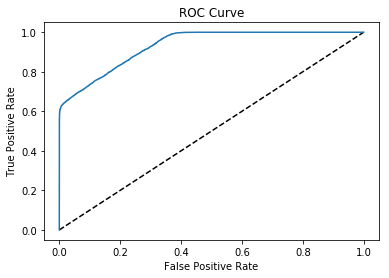

In [52]:
#plot ROC curve
plt.plot([0,1], [0,1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

#### Further Tuning of hyperparameters using a smaller training subset due to time.

In [9]:
#Random 20,000 rows of df
df_subset = df.sample(20000, random_state=42)
subset_red_win = df_subset['red_team_win'].values
subset_blue_win = df_subset['blue_team_win'].values
subset_game_length = df_subset['game_length_mins'].values

In [10]:
X_subset = df_subset.drop(['red_team_win', 'blue_team_win', 'game_length_mins'], axis=1)
X_subset = pd.get_dummies(X_subset, columns=cat_feat, drop_first=True)

In [11]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_subset, subset_red_win,
                                                       test_size=0.2, random_state=42)

In [131]:
#tighter parameter grid
param_grid2 = {'n_estimators': [58, 59, 60, 61, 62],
              'max_features': ['sqrt'],
              'max_depth': [78, 79, 80, 81, 82],
              'min_samples_split': [3, 4, 5, 6, 9, 10],
              'min_samples_leaf': [1, 2, 3],
              'bootstrap': [True, False]}

In [135]:
rf5 = RandomForestClassifier()
rf_grid_cv = GridSearchCV(estimator=rf5, param_grid=param_grid2,
                                cv=3, n_jobs=2)

In [136]:
rf_grid_cv.fit(X_train2, y_train2)

GridSearchCV(cv=3, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=2,
       param_grid={'n_estimators': [58, 59, 60, 61, 62], 'max_features': ['sqrt'], 'max_depth': [78, 79, 80, 81, 82], 'min_samples_split': [3, 4, 5, 6, 9, 10], 'min_samples_leaf': [1, 2, 3], 'bootstrap': [True, False]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [137]:
#Best estimator from the grid search
rf_grid_cv.best_params_

{'bootstrap': True,
 'max_depth': 79,
 'max_features': 'sqrt',
 'min_samples_leaf': 3,
 'min_samples_split': 4,
 'n_estimators': 58}

In [140]:
rf_grid_cv.score(X_test, y_test)

0.6790054281211697

### Try searching for better hyperparameters

In [10]:
#set N_iter to 25 to see if we can get better hyper paramters
rf_rand_cv_25 = RandomizedSearchCV(estimator=rf, param_distributions=param_grid,
                                cv=5, n_iter=25, random_state=42)

In [11]:
rf_rand_cv_25.fit(X_train, y_train)

RandomizedSearchCV(cv=5, error_score='raise',
          estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
          fit_params=None, iid=True, n_iter=25, n_jobs=1,
          param_distributions={'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 3, 5, 10], 'min_samples_leaf': [1, 2, 3, 4], 'bootstrap': [True, False]},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score='warn', scoring=None, verbose=0)

In [12]:
rf_rand_cv_25.best_params_

{'bootstrap': False,
 'max_depth': 60,
 'max_features': 'auto',
 'min_samples_leaf': 4,
 'min_samples_split': 3,
 'n_estimators': 90}

In [14]:
# pickle the model
#file_name = 'rf_model_1.pickle'
#with open('ML_models\\'+file_name, 'wb') as file:
#    pickle.dump(rf_rand_cv_25, file)

In [15]:
rf_rand_cv_25.best_score_

0.7890612688017651

In [20]:
results_rf = pd.DataFrame(rf_rand_cv_25.cv_results_)

C:\Users\jltsa\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\jltsa\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\jltsa\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\jltsa\Anaconda3\lib\site-packages\sklearn\util

In [21]:
results_rf

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_min_samples_split,param_min_samples_leaf,param_max_features,param_max_depth,param_bootstrap,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,18.161432,0.358706,0.417631,0.011522,10,10,2,sqrt,110,False,"{'n_estimators': 10, 'min_samples_split': 10, ...",0.781649,0.786202,0.787559,0.784485,0.776387,0.783257,0.003962,15,0.997395,0.997176,0.997231,0.997538,0.997341,0.997336,0.000127
1,69.548541,1.746423,0.806370,0.018504,40,2,3,sqrt,None,False,"{'n_estimators': 40, 'min_samples_split': 2, '...",0.784933,0.786684,0.788697,0.785448,0.779845,0.785121,0.002940,9,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
2,6.740825,0.095760,0.346635,0.007000,10,5,2,sqrt,30,True,"{'n_estimators': 10, 'min_samples_split': 5, '...",0.694055,0.689590,0.689109,0.694129,0.693823,0.692141,0.002287,24,0.840939,0.832086,0.825705,0.838096,0.841707,0.835707,0.006037
3,13.949662,0.249374,0.384508,0.006001,10,10,3,sqrt,50,False,"{'n_estimators': 10, 'min_samples_split': 10, ...",0.767598,0.763264,0.767554,0.768901,0.766187,0.766701,0.001921,19,0.969324,0.964104,0.959792,0.966227,0.966194,0.965128,0.003146
4,90.972121,2.569169,1.001722,0.052421,70,5,3,auto,50,False,"{'n_estimators': 70, 'min_samples_split': 5, '...",0.784276,0.786640,0.786333,0.787112,0.785142,0.785901,0.001041,5,0.999934,0.999902,0.999934,0.999945,0.999869,0.999917,0.000028
5,27.566918,0.260747,0.490514,0.012507,20,10,2,auto,50,False,"{'n_estimators': 20, 'min_samples_split': 10, ...",0.781255,0.782087,0.788697,0.786543,0.780458,0.783808,0.003228,12,0.995163,0.992733,0.994419,0.995272,0.994462,0.994410,0.000908
6,35.808305,0.516323,0.648543,0.006390,30,3,3,sqrt,None,True,"{'n_estimators': 30, 'min_samples_split': 3, '...",0.784101,0.779942,0.783970,0.781990,0.780108,0.782022,0.001795,17,0.992361,0.993226,0.992525,0.992777,0.992810,0.992740,0.000294
7,36.406998,0.354982,0.672647,0.008480,30,3,2,sqrt,100,True,"{'n_estimators': 30, 'min_samples_split': 3, '...",0.781212,0.782481,0.786902,0.783654,0.781509,0.783152,0.002061,16,0.998293,0.998369,0.998337,0.998161,0.998304,0.998293,0.000071
8,73.650992,1.272277,0.828861,0.010074,50,3,4,sqrt,60,False,"{'n_estimators': 50, 'min_samples_split': 3, '...",0.783225,0.788172,0.789135,0.787287,0.784573,0.786478,0.002227,3,0.999573,0.999639,0.999661,0.999628,0.999661,0.999632,0.000032
9,105.907686,1.010205,1.094454,0.008458,60,5,1,sqrt,80,False,"{'n_estimators': 60, 'min_samples_split': 5, '...",0.783926,0.785064,0.789398,0.785186,0.784267,0.785568,0.001973,8,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000


In [22]:
rf_predict = rf_rand_cv_25.predict(X_test)

In [23]:
print(classification_report(y_test, rf_predict))

             precision    recall  f1-score   support

       Fail       0.82      0.82      0.82     14336
        Win       0.82      0.82      0.82     14219

avg / total       0.82      0.82      0.82     28555



In [56]:
#ROC Cuve
y_pred_prob = rf_rand_cv_25.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob, pos_label='Win')

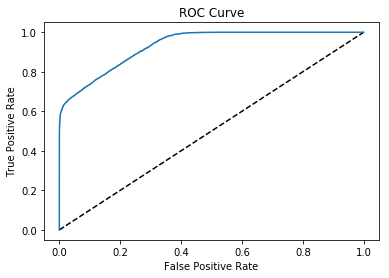

In [57]:
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [16]:
rf6 = RandomForestClassifier(bootstrap=True,
                                max_depth=60, max_features='auto',
                                min_samples_leaf=4, min_samples_split=3,
                                n_estimators=90)

rf5_cv_score = cross_val_score(rf6, X, red_win, cv=5 )

In [17]:
print(rf5_cv_score)

[0.92547976 0.95829102 0.86579814 0.66106325 0.67388107]


In [18]:
np.mean(rf5_cv_score)

0.8169026458602264

## Logistic Regression Model

### Out of the box logistic regression model

In [10]:
lgc = LogisticRegression()
lgc_X_train, lgc_X_test, lgc_y_train, lgc_y_test = train_test_split(X, red_win, test_size=0.2, random_state=42)
lgc.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [11]:
#test score
lgc.score(lgc_X_test, lgc_y_test)

0.5657152862896165

In [12]:
predict_lgc = lgc.predict(lgc_X_test)

In [13]:
print(classification_report(lgc_y_test, predict_lgc))

             precision    recall  f1-score   support

       Fail       0.57      0.56      0.57     14336
        Win       0.56      0.57      0.57     14219

avg / total       0.57      0.57      0.57     28555



#### Test different values of C hyperparameter

In [24]:
lg_param_grid = {'C': [0.001, 0.01, 0.1, 10, 100, 1000]}

In [25]:
lgc2 = LogisticRegression()
lgc_cv = GridSearchCV(lgc2, lg_param_grid, cv=5)

In [26]:
lgc_cv.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [0.001, 0.01, 0.1, 10, 100, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [27]:
lgc_cv.best_params_

{'C': 0.1}

In [28]:
lgc_cv.best_score_

0.5612688017650458

In [29]:
predict_lgc_cv = lgc_cv.predict(X_test)

In [30]:
print(classification_report(y_test, predict_lgc_cv))

             precision    recall  f1-score   support

       Fail       0.57      0.57      0.57     14336
        Win       0.56      0.57      0.57     14219

avg / total       0.57      0.57      0.57     28555



## K Nearest Neighbors Model

### Out of the box KNN Model

In [16]:
knn = KNeighborsClassifier()
knn_X_train, knn_X_test, knn_y_train, knn_y_test = train_test_split(X, red_win, test_size=0.2, random_state=42)
knn.fit(knn_X_train, knn_y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [ ]:
knn.score(knn_X_test, knn_y_test)

In [ ]:
predict_knn = knn.predict(knn_X_test)

In [ ]:
print(classification_report(knn_y_test, predict_knn))

# Linear Support Vector Machine Classifier Model

### Out of the box SVC model

In [13]:
steps = [('scaler', StandardScaler()),
        ('svm', SVC(C=0.001, cache_size=1000.0))]

pl = Pipeline(steps)

In [14]:
pl.fit(X_train2, y_train2)

Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('svm', SVC(C=0.001, cache_size=1000.0, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))])

In [15]:
pl.score(X_test2, y_test2)

0.50525

In [16]:
svm_predict = pl.predict(X_test2)

In [17]:
print(classification_report(y_test2, svm_predict))

             precision    recall  f1-score   support

       Fail       0.51      1.00      0.67      2021
        Win       0.00      0.00      0.00      1979

avg / total       0.26      0.51      0.34      4000



C:\Users\jltsa\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
